In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Задача 2

Оценка методом ММП $Q' = (p_1, p_2)$:
$$p(X|Q') = p_1^{\sum_{1}^{N_1}X_i}*(1 - p_1)^{N_1 - \sum_{1}^{N_1}X_i} + p_2^{\sum_{N_1 + 1}^{N}X_i}*(1 - p_2)^{{N_2 - \sum_{N_{1} + 1}^{N_1 + N_2}X_i}} \longrightarrow \max_{(p_1, p_2)}$$

Получаем систему:
$$\frac{d\ ln(P(X|Q'))}{d p_i} = \frac{\#_{N_i}{1}}{p_i} - \frac{N_i - \#_{N_i}1}{1-p_i} = 0,\ i = 1,2.$$

Решение системы:
$$\hat{p_i} = \frac{\#_{N_i}{1}}{N_i},\ i = 1,2.$$

При $(\hat p_1, \hat p_2)$ достигается максимум функции правдоподобия, следовательно он достигается при $Q_{ML} = \hat{p_1} - \hat{p_2}$ -- это и есть оценка правдоподобия $Q$.

$$ DQ_{ML} = D\hat{p_1} + D\hat{p_2} = \frac{\#_{N_1}{1}(N_1 - \#_{N_1}1)}{N_1^3} + \
\frac{\#_{N_2}{1}(N_2 - \#_{N_2}1)}{N_2^3} \longrightarrow^{P}\
\frac{p_1*(1-p_1)}{N_1} + \frac{p_2*(1-p_2)}{N_2} = DQ$$

Напишем функции для подсчета теоретической и экспериментальной оценки Q и ее дисперсии, построим график.

In [2]:
def bootstrap_estimate_sigma_variation(n_1, n_2, x_1, x_2, number_iterations=1000):    
    sigma = []
    
    for i in range(number_iterations):
        X_1 = sps.bernoulli(x_1*1./n_1).rvs(n_1)
        X_2 = sps.bernoulli(x_2*1./n_2).rvs(n_2)
        
        sigma.append(np.sum(X_1)*1./n_1 - np.sum(X_2)*1./n_2)
    
    sigma = np.array(sigma)
    return np.mean(sigma), np.var(sigma)

In [3]:
def estimate_var_sigma(n_1, n_2, x_1, x_2):
    p_1 = x_1 * 1./ n_1
    p_2 = x_2 * 1./n_2
    return p_1 * (1 - p_1) / n_1 + p_2 * (1 - p_2) / n_2

In [4]:
def estimate_sigma(n_1, n_2, x_1, x_2):
    return (x_1 * 1.)/ n_1 - (x_2 * 1.) / n_2

In [5]:
mean_sigma1, var_sigma_1 = bootstrap_estimate_sigma_variation(58, 89, 10, 12)
th_sigma_1 = estimate_sigma(58, 89, 10, 12)
th_var_sigma1 = estimate_var_sigma(58, 89, 10, 12)

In [6]:
mean_sigma2, var_sigma_2 = bootstrap_estimate_sigma_variation(58, 89, 15, 12)
th_sigma_2 = estimate_sigma(58, 89, 15, 12)
th_var_sigma2 = estimate_var_sigma(58, 89, 15, 12)

In [7]:
mean_sigma3, var_sigma_3 = bootstrap_estimate_sigma_variation(58, 89, 21, 12)
th_sigma_3 = estimate_sigma(58, 89, 21, 12)
th_var_sigma3 = estimate_var_sigma(58, 89, 21, 12)

In [10]:
mean_sigma = np.array([mean_sigma1, mean_sigma2, mean_sigma3])
sigma_variation = np.array([var_sigma_1, var_sigma_2, var_sigma_3])
x_1_range = np.array([10, 15, 21])
th_sigma = np.array([th_sigma_1, th_sigma_2, th_sigma_3])
th_var_sigma = np.array([th_var_sigma1, th_var_sigma2, th_var_sigma3])

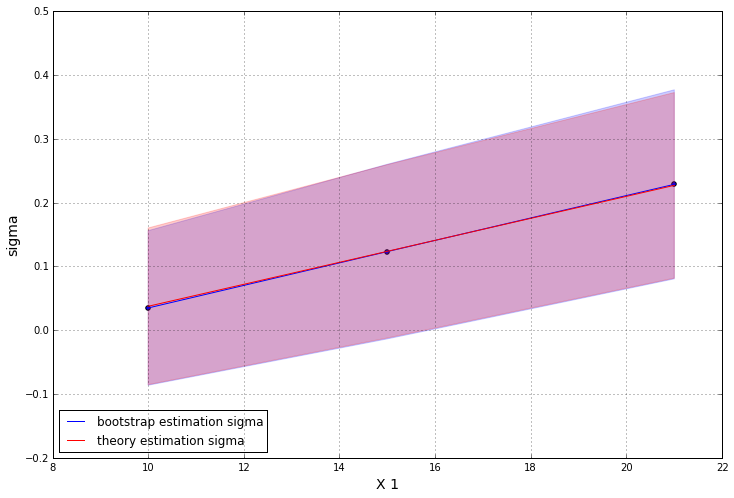

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x_1_range, mean_sigma)
plt.plot(x_1_range, mean_sigma, label='bootstrap estimation sigma')
plt.fill_between(x_1_range, mean_sigma - 2 * (sigma_variation ** 0.5),\
                 mean_sigma + 2 * (sigma_variation ** 0.5), color='b', alpha=0.2)
plt.plot(x_1_range, th_sigma, c='r', label='theory estimation sigma')
plt.fill_between(x_1_range, th_sigma - 2 * (th_var_sigma ** 0.5),\
                 th_sigma + 2 * (th_var_sigma ** 0.5), color='r', alpha=0.2)
plt.xlabel('X 1', fontsize=14)
plt.ylabel('sigma', fontsize=14)
plt.legend(loc=3)
plt.grid()
plt.show()

Видим, что оценка Q и DQ с помощью bootstrap практически не отличается от теоретически значений.

# Задача 5

## Исследование качества работы без ограничения на глубину дерева

In [68]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [69]:
with open('winequality-red.txt') as fin:
    data = []
    for line in fin:
        line = line.split(';')
        line = [float(item) for item in line]
        data.append(np.array(line))
        
data = np.array(data)

In [70]:
X_train = data[:1200,:-1]
y_train = data[:1200, -1]

In [71]:
X_test = data[-1200:,:-1]
y_test = data[-1200:, -1]

In [96]:
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train, y_train)

boost_predictions_train = list(model.staged_predict(X_train))
boost_errors_train = [mean_squared_error(boost_predictions_train[i], y_train) for i in range(1000)]

boost_predictions_test = list(model.staged_predict(X_test))
boost_errors_test = [mean_squared_error(boost_predictions_test[i], y_test) for i in range(1000)]

In [97]:
model2 = RandomForestRegressor(n_estimators=1000)
model2.fit(X_train, y_train)

forest_errors_train = []
forest_errors_test = []
for i in range(1, 1001):
    prediction_train  = np.mean(np.array([model2.estimators_[j].predict(X_train) for j in range(i)]), axis = 0)
    prediction_test  = np.mean(np.array([model2.estimators_[j].predict(X_test) for j in range(i)]), axis = 0)
    
    forest_errors_train.append(mean_squared_error(prediction_train, y_train))
    forest_errors_test.append(mean_squared_error(prediction_test, y_test))

In [98]:
n_estimators_range = range(1, 1001)

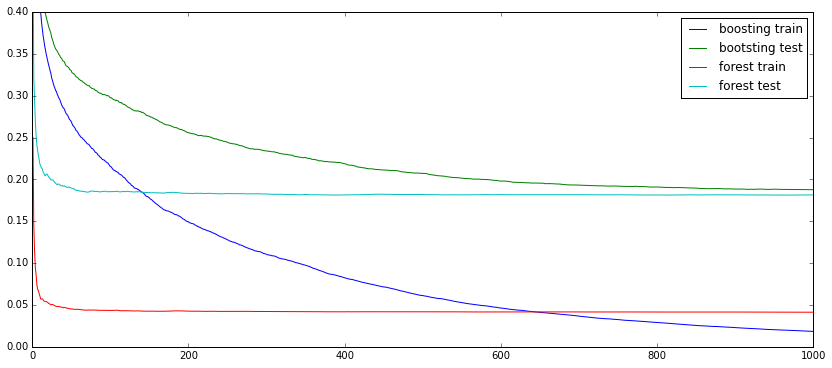

In [102]:
plt.figure(figsize=(14,6))
plt.plot(n_estimators_range, boost_errors_train, label='boosting train')
plt.plot(n_estimators_range, boost_errors_test, label='bootsting test')
plt.plot(n_estimators_range, forest_errors_train, label='forest train')
plt.plot(n_estimators_range, forest_errors_test, label='forest test')
plt.legend(loc=1)
plt.ylim((0,0.4))
plt.show()

Random forest дал лучшее качество, нежели Boosting.

In [113]:
def show_boosting_error(number_estimators, max_depth):
    n_estimators_range = range(number_estimators)
    model = GradientBoostingRegressor(n_estimators=number_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)

    boost_predictions_train = list(model.staged_predict(X_train))
    boost_errors_train = [mean_squared_error(boost_predictions_train[i], y_train) for i in range(number_estimators)]

    boost_predictions_test = list(model.staged_predict(X_test))
    boost_errors_test = [mean_squared_error(boost_predictions_test[i], y_test) for i in range(number_estimators)]
    
    model2 = RandomForestRegressor(n_estimators=number_estimators, max_depth=max_depth)
    model2.fit(X_train, y_train)

    forest_errors_train = []
    forest_errors_test = []
    for i in range(1, number_estimators+1):
        prediction_train  = np.mean(np.array([model2.estimators_[j].predict(X_train) for j in range(i)]), axis = 0)
        prediction_test  = np.mean(np.array([model2.estimators_[j].predict(X_test) for j in range(i)]), axis = 0)

        forest_errors_train.append(mean_squared_error(prediction_train, y_train))
        forest_errors_test.append(mean_squared_error(prediction_test, y_test))
        
        
    plt.figure(figsize=(14,6))
    plt.plot(n_estimators_range, boost_errors_train, label='boosting train')
    plt.plot(n_estimators_range, boost_errors_test, label='bootsting test')
    plt.plot(n_estimators_range, forest_errors_train, label='forest train')
    plt.plot(n_estimators_range, forest_errors_test, label='forest test')
    plt.legend(loc=1)
    plt.title('Error plot for boosting and random forest with max depth={}'.format(max_depth), fontsize=16)
    plt.xlabel('number estimators', fontsize=14)
    plt.ylabel('error', fontsize=14)
    plt.ylim((0,max(boost_errors_test)-0.2))
    plt.show()

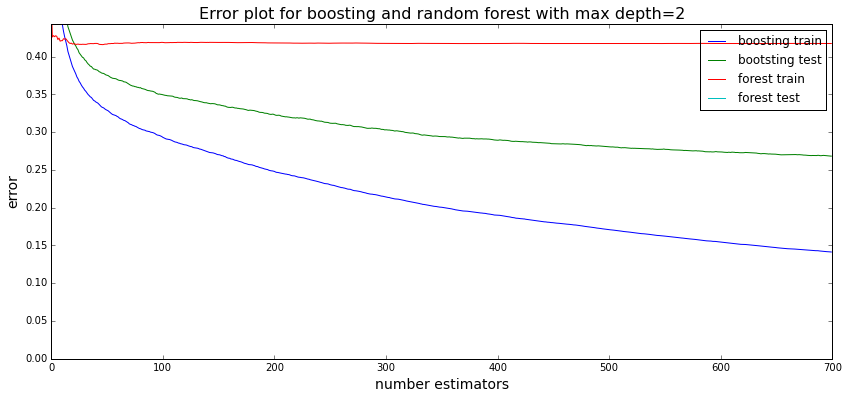

In [117]:
show_boosting_error(700,2)

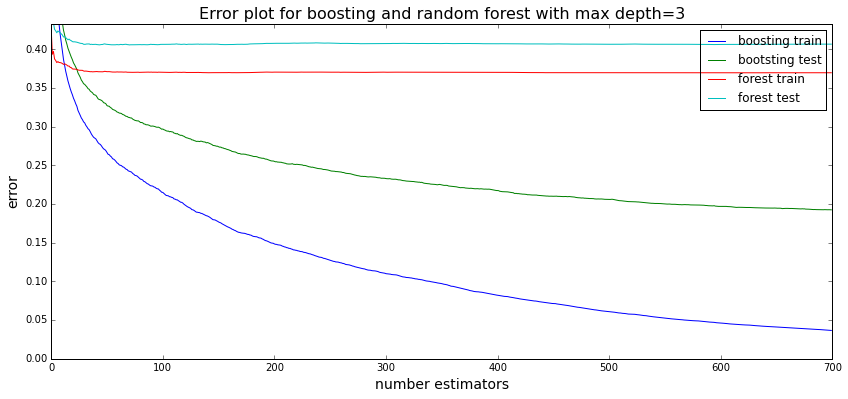

In [114]:
show_boosting_error(700,3)

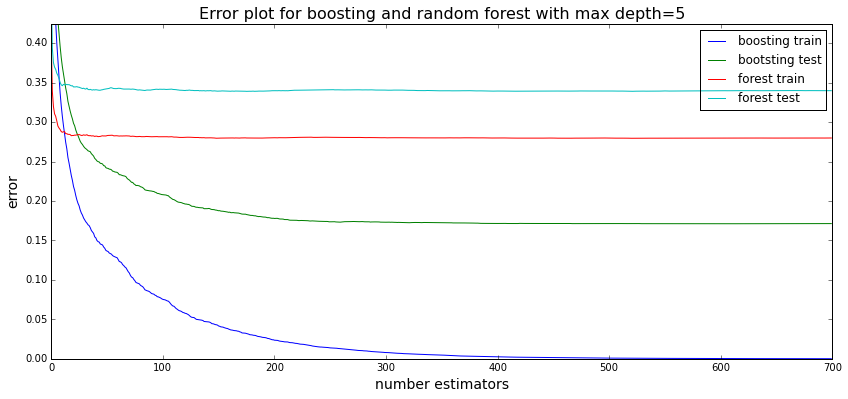

In [115]:
show_boosting_error(700,5)

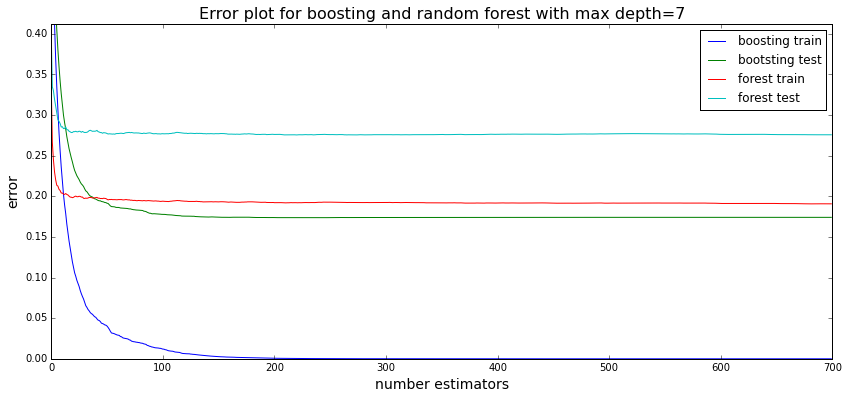

In [116]:
show_boosting_error(700,7)

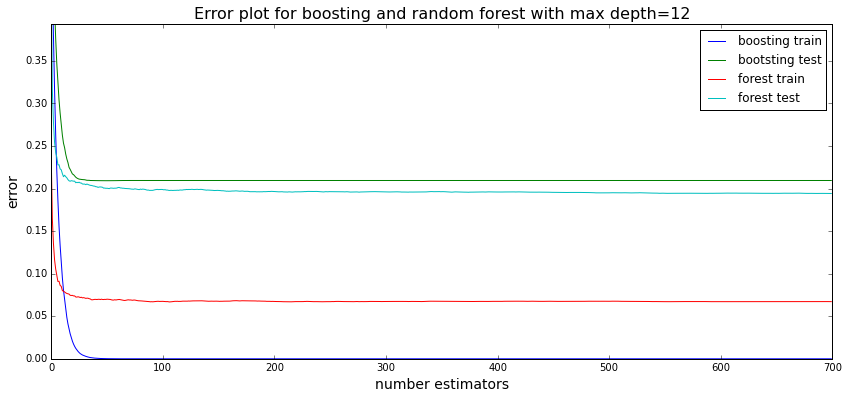

In [118]:
show_boosting_error(700,12)

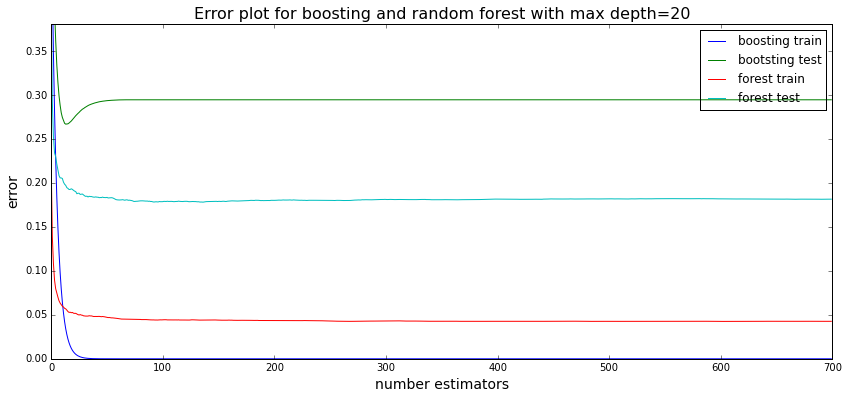

In [119]:
show_boosting_error(700, 20)

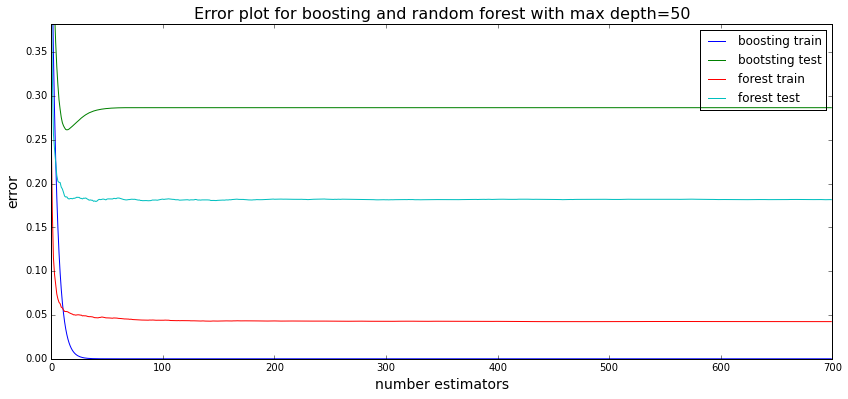

In [120]:
show_boosting_error(700, 50)